In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', 500)

# For plotting
from itertools import cycle

plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


### Load in the Dataset And Parse Tweet Text

In [3]:
tweets = pd.read_csv('tweets.csv')

In [4]:
def process_tweets(tweets):
    tweets['tweet_datetime'] = pd.to_datetime(tweets['tweet_date'])
    tweets['tweet_date'] = tweets['tweet_datetime'].dt.date
    tweets['wordle_id'] = tweets['tweet_text'].str[:10]
    tweets['n_attempts'] = tweets['tweet_text'].str[11].astype('int')
    tweets['id'] = tweets['tweet_text'].str[7:10].astype('int')
    return tweets
tweets = process_tweets(tweets)

### How many tweets do we have for each day

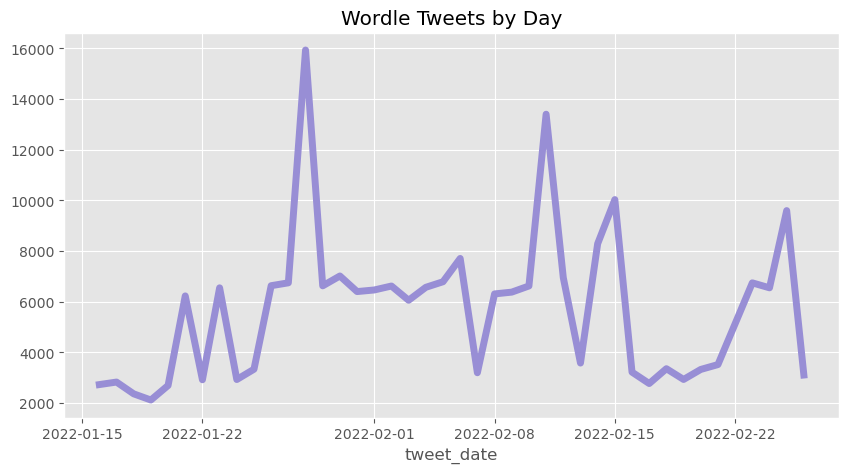

In [5]:
tweets_per_day = tweets['tweet_date'].value_counts().sort_index()
tweets_per_day.plot(figsize=(10, 5),
                    title='Wordle Tweets by Day',
                    color= color_pal[2], lw=5 )
plt.show()

### Number of Attempts Analysis

In [6]:
tweets.groupby(['wordle_id', 'n_attempts']).size() \
    .unstack(fill_value=0).style.background_gradient(axis=1)   

n_attempts,2,3,4,5,6
wordle_id,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


### How many attempts does it usually take to solve?

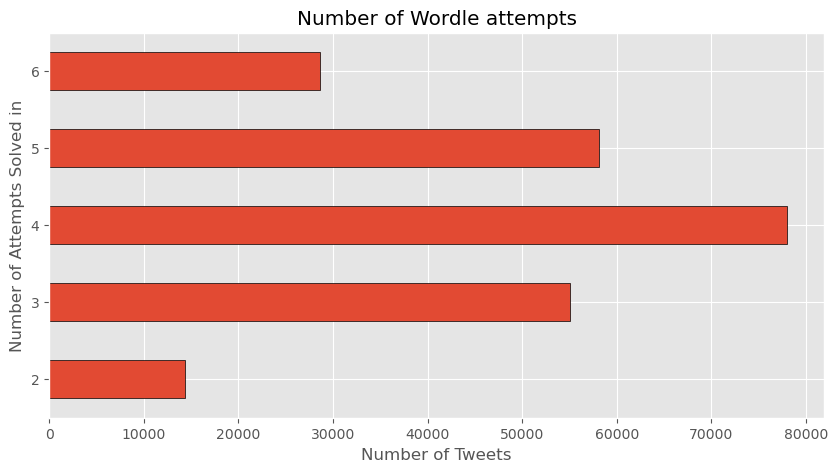

In [7]:
tweets['n_attempts'].value_counts().sort_index()\
                    .plot(figsize=(10, 5), kind='barh', 
                    xlabel='Number of Tweets', ylabel='Number of Attempts Solved in', 
                    title='Number of Wordle attempts', edgecolor='black')
plt.show()

### Parse Tweet Text

In [8]:
# Make dark squares consistant
tweets['tweet_text'] = tweets['tweet_text'].str.replace('⬜','⬛')

In [9]:
def parse_tweet_text(tweets):
    for n in range(6):
        n += 1 
        tweets[f'has_guess{n}']= tweets['tweet_text'].str.split('\n').str[n+1]\
                            .str.contains('|'.join(['🟨','⬛','🟩'])) \
                            .fillna(False)

        # Parse out the tweet text
        tweets.loc[tweets[f'has_guess{n}'], f'guess{n}'] = \
                tweets['tweet_text'].str.split('\n').str[n + 1].str[:5]

        # Count number correct, misplaced, and incorrect
        tweets.loc[tweets[f'has_guess{n}'],
                    f'guess{n}_incorrect'] = tweets[f'guess{n}'].str.count('⬛')
        tweets.loc[tweets[f'has_guess{n}'],
                    f'guess{n}_wrong_spot'] = tweets[f'guess{n}'].str.count('🟨')
        tweets.loc[tweets[f'has_guess{n}'],
                    f'guess{n}_correct'] = tweets[f'guess{n}'].str.count('🟩')
        tweets.loc[tweets[f'guess{n}_correct'] == 6, 'final_guess'] = n
    return tweets
parse_tweet_text(tweets)

C:\Users\hp\AppData\Local\Temp\ipykernel_15032\3931592385.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
C:\Users\hp\AppData\Local\Temp\ipykernel_15032\3931592385.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
C:\Users\hp\AppData\Local\Temp\ipykernel_15032\3931592385.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_dow

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attempts,id,has_guess1,guess1,guess1_incorrect,guess1_wrong_spot,guess1_correct,final_guess,has_guess2,guess2,guess2_incorrect,guess2_wrong_spot,guess2_correct,has_guess3,guess3,guess3_incorrect,guess3_wrong_spot,guess3_correct,has_guess4,guess4,guess4_incorrect,guess4_wrong_spot,guess4_correct,has_guess5,guess5,guess5_incorrect,guess5_wrong_spot,guess5_correct,has_guess6,guess6,guess6_incorrect,guess6_wrong_spot,guess6_correct
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,4,210,True,⬛⬛🟨🟨⬛,3.0,2.0,0.0,NaN,True,🟩⬛⬛⬛⬛,4.0,0.0,1.0,True,🟩🟩🟨⬛⬛,2.0,1.0,2.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬛⬛⬛⬛⬛\n🟩🟩🟨🟨⬛\n🟩🟩⬛🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,4,210,True,⬛⬛⬛⬛⬛,5.0,0.0,0.0,NaN,True,🟩🟩🟨🟨⬛,1.0,2.0,2.0,True,🟩🟩⬛🟩🟨,1.0,1.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬛⬛⬛🟨⬛\n⬛🟩⬛🟨⬛\n⬛🟩⬛🟨⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,4,210,True,⬛⬛⬛🟨⬛,4.0,1.0,0.0,NaN,True,⬛🟩⬛🟨⬛,3.0,1.0,1.0,True,⬛🟩⬛🟨⬛,3.0,1.0,1.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟨🟨⬛⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,3,210,True,⬛⬛🟨⬛⬛,4.0,1.0,0.0,NaN,True,🟨🟨⬛⬛⬛,3.0,2.0,0.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,3,210,True,⬛⬛🟨⬛⬛,4.0,1.0,0.0,NaN,True,🟩🟩🟩⬛⬛,2.0,0.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234181,Wordle 251,1497413074709590024,2022-02-26,SammieLee14,Wordle 251 6/6\n\n⬛⬛⬛⬛⬛\n⬛⬛⬛⬛⬛\n⬛⬛🟨⬛⬛\n⬛🟩⬛⬛⬛\n...,2022-02-26 03:27:52+00:00,6,251,True,⬛⬛⬛⬛⬛,5.0,0.0,0.0,NaN,True,⬛⬛⬛⬛⬛,5.0,0.0,0.0,True,⬛⬛🟨⬛⬛,4.0,1.0,0.0,True,⬛🟩⬛⬛⬛,4.0,0.0,1.0,True,⬛🟩🟨⬛⬛,3.0,1.0,1.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0
234182,Wordle 251,1497413096457097218,2022-02-26,real_hotaru,Wordle 251 5/6\n\n⬛⬛⬛⬛⬛\n⬛⬛⬛⬛⬛\n🟨⬛🟨⬛⬛\n⬛⬛🟨⬛⬛\n...,2022-02-26 03:27:57+00:00,5,251,True,⬛⬛⬛⬛⬛,5.0,0.0,0.0,NaN,True,⬛⬛⬛⬛⬛,5.0,0.0,0.0,True,🟨⬛🟨⬛⬛,3.0,2.0,0.0,True,⬛⬛🟨⬛⬛,4.0,1.0,0.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN
234183,Wordle 251,1497413098210222084,2022-02-26,mmelmazz,Wordle 251 5/6\n\n⬛⬛⬛⬛⬛\n⬛🟩⬛⬛⬛\n🟨🟩⬛⬛⬛\n⬛🟩🟩🟩🟩\n...,2022-02-26 03:27:57+00:00,5,251,True,⬛⬛⬛⬛⬛,5.0,0.0,0.0,NaN,True,⬛🟩⬛⬛⬛,4.0,0.0,1.0,True,🟨🟩⬛⬛⬛,3.0,1.0,1.0,True,⬛🟩🟩🟩🟩,1.0,0.0,4.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN
234184,Wordle 251,1497413110725943298,2022-02-26,Ancient_Wonder,Wordle 251 3/6\n\n⬛⬛🟩⬛⬛\n🟩🟩⬛🟩⬛\n🟩🟩🟩🟩🟩,2022-02-26 03:28:00+00:00,3,251,True,⬛⬛🟩⬛⬛,4.0,0.0,1.0,NaN,True,🟩🟩⬛🟩⬛,2.0,0.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [10]:
#Keep additional tweet text
tweets['additional_text'] = \
    tweets.loc[~tweets['tweet_text'] \
    .str.split('\n').str[-1].str.contains('🟩')] \
    ['tweet_text'].str.split('\n').str[-1]

### Plot Results by Attempts

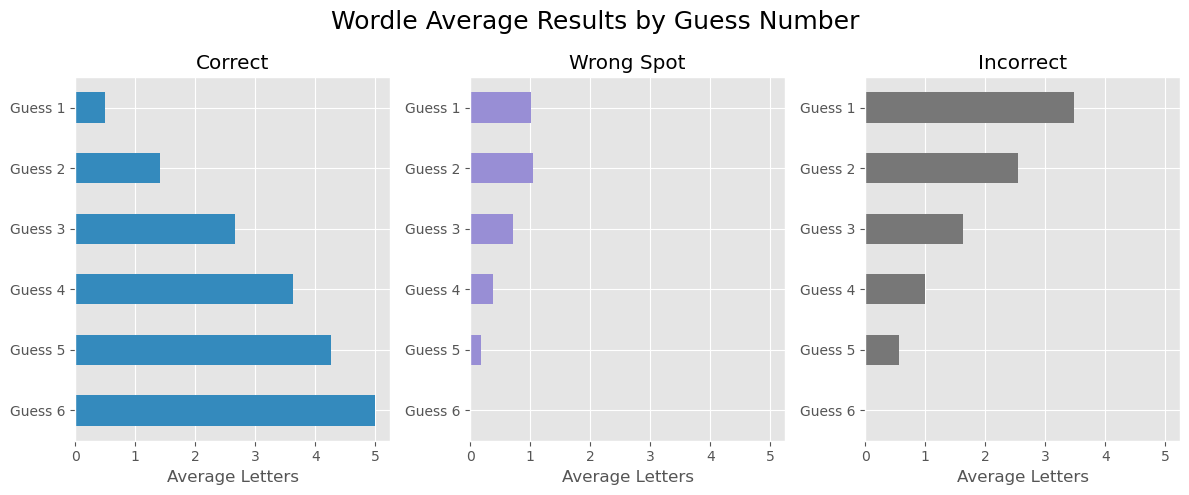

In [15]:
fig, axs = plt.subplots(1, 3, figsize = (12, 5), sharex = True)
for i, x in enumerate(['_correct','_wrong_spot','_incorrect']):
    col_subset = [c for c in tweets.columns if x in c]
    guess_avg = tweets[col_subset].mean()
    guess_avg.index = [f'Guess {i+1}' for i in range(6)]
    guess_avg.sort_index(ascending=False) \
        .plot(kind='barh',
              title=f'{x.strip("_").replace("_"," ").title()}',
              ax=axs[i],
              color=color_pal[i+1])
    axs[i].set_xlabel('Average Letters')
fig.suptitle('Wordle Average Results by Guess Number', fontsize=18)
plt.tight_layout()
plt.show()

### Letter Analysis 

In [20]:
answer_dict = {252 : 'SPILL',
     251 : 'VIVID',
     250 : 'BLOKE',
     249 : 'TROVE',
     248 : 'THORN',
     247 : 'OTHER',
     246 : 'TACIT',
     245 : 'SWILL',
     244 : 'DODGE',
     243 : 'SHAKE',
     242 : 'CAULK',
     241 : 'AROMA',
     240 : 'CYNIC',
     239 : 'ROBIN',
     238 : 'ULTRA',
     237 : 'ULCER',
     236 : 'PAUSE',
     235 : 'HUMOR',
     234 : 'FRAME',
     233 : 'ELDER',
     232 : 'SKILL',
     231 : 'ALOFT',
     230 : 'PLEAT',
     229 : 'SHARD',
     228 : 'MOIST',
     227 : 'THOSE',
     204 : 'GORGE',
     205 : 'QUERY',
     206 : 'DRINK',
     207 : 'FAVOR',
     208 : 'ABBEY',
     209 : 'TANGY',
     210 : 'PANIC',
     211 : 'SOLAR',
     212 : 'SHIRE',
     213 : 'PROXY',
     214 : 'POINT',
     215 : 'ROBOT',
     216 : 'PRICK',
     217 : 'WINCE',
     218 : 'CRIMP',
     219 : 'KNOLL',
     220 : 'SUGAR',
     221 : 'WHACK',
     222 : 'MOUNT',
     223 : 'PERKY',
     224 : 'COULD',
     225 : 'WRUNG',
     226 : 'LIGHT',
}

tweets['answer'] = tweets['id'].map(answer_dict)

In [21]:
first_guess_correct = []
for i, d in tweets.dropna(subset=['answer']).iterrows():
    example_text = d['guess1']
    example_solution = d['answer']
    results =[x.span()[0] for x in re.finditer('🟩', example_text)]
    first_guess_letters = [example_solution[i] for i in results]
    first_guess_correct += first_guess_letters

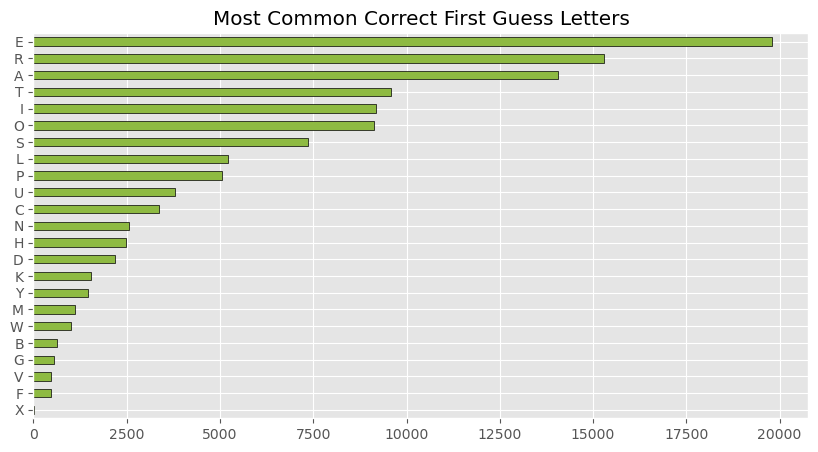

In [22]:
pd.Series(first_guess_correct).value_counts(ascending=True) \
    .plot(kind='barh', figsize=(10, 5),
         title='Most Common Correct First Guess Letters',
         edgecolor='black', color=color_pal[5])
plt.show()